# Your Title Here

**Name(s)**: Pratham Aggarwal

**Website Link**: (your website link)

In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
# pd.options.plotting.backend = 'plotly'
# from dsc80_utils import *
from project import *
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Step 1: Introduction

In [3]:
# TODO
# data_dct = https://www.sciencedirect.com/science/article/pii/S2352340918307182
fp = Path('data') / 'outage.csv'
raw_df = pd.read_csv(fp, skiprows=5)

## Step 2: Data Cleaning and Exploratory Data Analysis

In [4]:
# TODO
df = raw_df.copy(deep=True)
df.columns = [col.lower() for col in df.columns]
units = df.iloc[0]

df = df.iloc[1:].reset_index(drop=True)

new_columns = []
for col, unit in zip(df.columns, units):
    if pd.notna(unit):
        new_columns.append(f"{col} ({unit})")
    else:
        new_columns.append(col)

df.columns = new_columns
#state abbreiation are df['postal.code'] hence drop it
df = df.drop(columns = ['obs','variables (Units)', 'postal.code'])
df.columns = df.columns.str.lower()

In [5]:
#dropping outage start and restore and making a single col for start time/date and end; month/year is redundant info
#hurrican name is useless for our analysis
df = df.rename(columns={
    "outage.start.date (day of the week, month day, year)": "start_date",
    "outage.start.time (hour:minute:second (am / pm))": "start_time",
    "outage.restoration.date (day of the week, month day, year)": "restore_date",
    "outage.restoration.time (hour:minute:second (am / pm))": "restore_time"
})
fmt = "%A, %B %d, %Y %I:%M:%S %p"

df["outage_start"] = pd.to_datetime(df["start_date"] + " " + df["start_time"], format=fmt)
df["outage_restore"] = pd.to_datetime(df["restore_date"] + " " + df["restore_time"], format=fmt)

#df['dur'] =  (df['outage_restore'] - df['outage_start']).dt.total_seconds() / 60
#since outage.duration is linearly dependent on outage_start & outage_restore, to I will drop it to avoid redundant info
df = df.drop(
    columns=[
        "start_date", 
        "start_time", 
        "restore_date", 
        "restore_time", 
        "year", 
        "month", 
        "hurricane.names",
        "outage.duration (mins)"
    ]
)

## Step 3: Assessment of Missingness

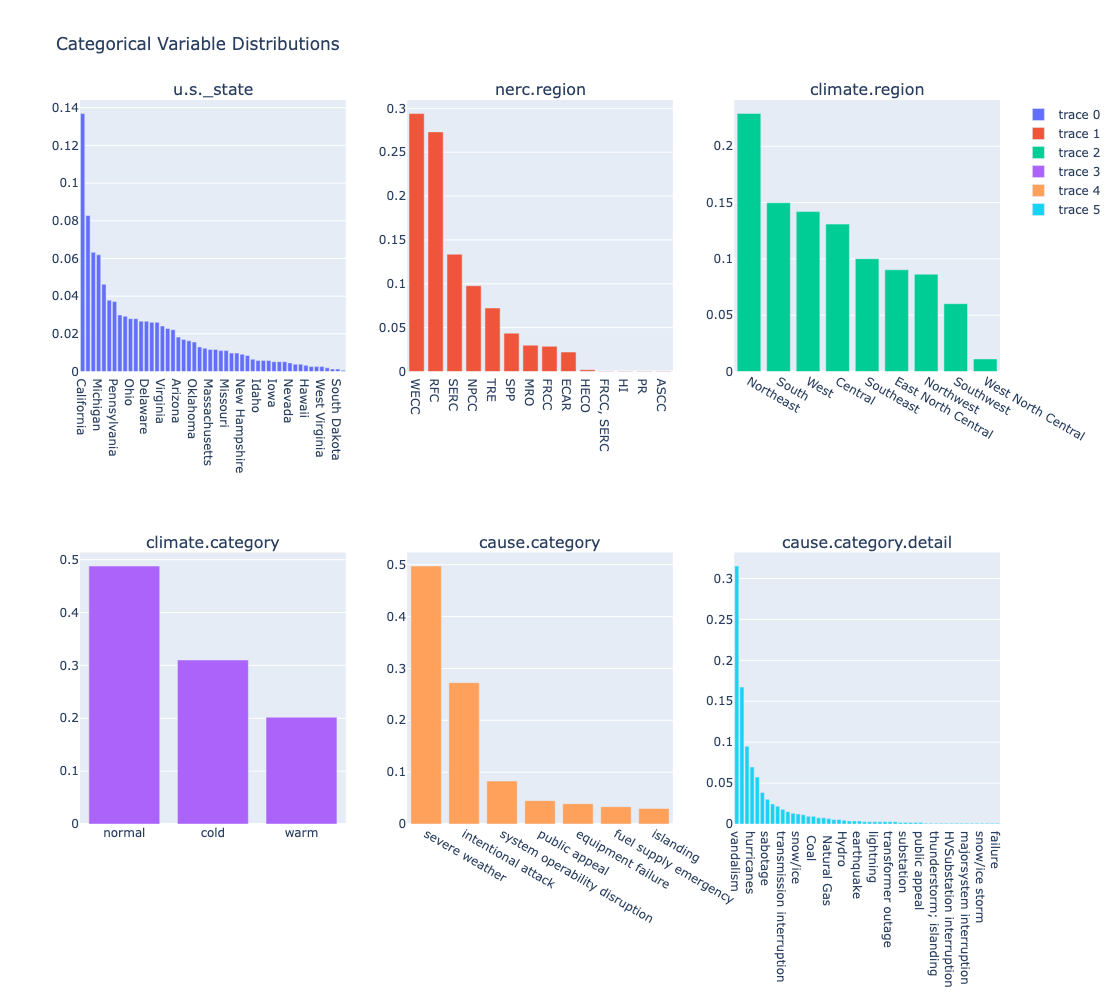

In [25]:
categorical_vars, numeric_vars, datetime_vars = get_variable_lists()

n = len(categorical_vars)
rows = (n + 2) // 3
cols = 3

fig = make_subplots(rows=rows, cols=cols, subplot_titles=categorical_vars)

row, col = 1, 1

for var in categorical_vars:
    vc = df[var].value_counts(normalize=True).reset_index()
    vc.columns = [var, 'proportion']
    fig.add_trace(go.Bar(x=vc[var], y=vc['proportion']), row=row, col=col)
    col += 1
    if col > cols:
        col = 1
        row += 1
        
fig.update_layout(height=500 * rows, width=1200, title="Categorical Variable Distributions")
fig.show()
#courtesy plotly subplots reference: https://plotly.com/python/subplots

## Step 4: Hypothesis Testing

In [7]:
# TODO

## Step 5: Framing a Prediction Problem

In [8]:
# TODO

## Step 6: Baseline Model

In [9]:
# TODO

## Step 7: Final Model

In [10]:
# TODO

## Step 8: Fairness Analysis

In [11]:
# TODO